In [1]:
# importing basic packages
import numpy as np 
import pandas as pd 
import datetime 
# Viz
import matplotlib.pyplot as plt 
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor

# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the datasets
features = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/features.csv')
train    = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/train.csv')
stores   = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/stores.csv')

In [3]:
df_names=['features','stores','train']
df_list=[features,stores,train]
for i in range(3):
    print('--'*25)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*25)
    display(df_list[i].head(5))

--------------------------------------------------
Dataframe features has 8190 rows and 12 columns.
--------------------------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------
Dataframe stores has 45 rows and 3 columns.
--------------------------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


--------------------------------------------------
Dataframe train has 421570 rows and 5 columns.
--------------------------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
#merging the data
df1= train.merge(stores, how='left').merge(features, how='left')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [5]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Week'] = pd.to_datetime(df1['Date']).dt.week
df1['Day'] = pd.to_datetime(df1['Date']).dt.day
df1.replace({'A': 1, 'B': 2,'C':3},inplace=True)
df1['IsHoliday'] = df1['IsHoliday'].apply(lambda x: 1 if x == True else 0)
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5


In [6]:
#Replacing the null values in markdown columns with 0
df1.iloc[:,9:14]=df1.iloc[:,9:14].fillna(0)


In [7]:
#Creating a markdown variable in the dataframe which is equal to 1 if any of the markdown is equal to 1, otherwise 0
df1['markdown'] = df1.iloc[:,9:14].sum(axis=1)
df1['markdown'] = df1['markdown'].apply(lambda x:0 if x==0 else 1)

In [8]:
df1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [9]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,2012,9,39,28,1
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,2012,10,40,5,1
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,2012,10,41,12,1
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,2012,10,42,19,1


In [10]:
#Moving the target variable 'Weekly_Sales' to the end of the dataframe. It will be easy to read the corr matrix 
cols = list(df1.columns)
cols.pop(cols.index('Weekly_Sales')) 
df1 = df1[cols+['Weekly_Sales']]
df1.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown,Weekly_Sales
0,1,1,2010-02-05,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0,24924.50
1,1,1,2010-02-12,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0,46039.49
2,1,1,2010-02-19,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0,41595.55
3,1,1,2010-02-26,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0,19403.54
4,1,1,2010-03-05,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0,21827.90


In [11]:
store_ids = df1['Store'].unique()
store_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [12]:
# splitting the data into two data frames - one for 30 stores and one for 15 stores
# first, we will select the store id's for the 30 stores
store_ids_30 = df1['Store'].unique()[:30]
df_30 = df1[df1['Store'].isin(store_ids_30)]

In [13]:
# then, we will select the store id's for the 15 stores
store_ids_15 = df1['Store'].unique()[30:]
df_15 = df1[df1['Store'].isin(store_ids_15)]

In [14]:
# splitting the 30 stores dataframe into two separate data frames - one for 20 stores and one for 10 stores 

# first, we will select the store id's for the 20 stores
store_ids_20 = df_30['Store'].unique()[:20]
df_20 = df_30[df_30['Store'].isin(store_ids_20)]

In [15]:
# then, we will select the store id's for the 10 stores
store_ids_10 = df_30['Store'].unique()[20:]
df_10 = df_30[df_30['Store'].isin(store_ids_10)]


In [16]:
# now, we will train the model on the 20 stores
X_20 = df_20.drop(['Weekly_Sales','Date'], axis=1)
y_20 = df_20['Weekly_Sales']

In [17]:
# splitting the 20 stores into train and test sets
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)

In [18]:
# training the model
regressor_20 = LinearRegression()
regressor_20.fit(X_train_20, y_train_20)

LinearRegression()

In [19]:
# now, we will train the model on the 10 stores
X_10 = df_10.drop(['Weekly_Sales', 'Date'], axis=1)
y_10 = df_10['Weekly_Sales']

In [20]:
# splitting the 10 stores into train and test sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)

In [21]:
# training the model
regressor_10 = LinearRegression()
regressor_10.fit(X_train_10, y_train_10)


LinearRegression()

In [22]:
# now, we will merge the 20 and 10 stores and test the model 
X = pd.concat([X_train_20, X_train_10])
y = pd.concat([y_train_20, y_train_10])

In [23]:
# training the model
regressor = LinearRegression()
regressor.fit(X, y)


LinearRegression()

In [24]:
# testing the model
X_test = pd.concat([X_test_20, X_test_10])
y_test = pd.concat([y_test_20, y_test_10])

In [25]:
# predicting the output
y_pred = regressor.predict(X_test)

In [26]:
# calculating the accuracy of the model
accuracy = regressor.score(X_test, y_test)
print('Model accuracy: ', accuracy)

Model accuracy:  0.08236888847421564


In [27]:
# then, we will select the store id's for the 15 stores
store_ids_15 = df1['Store'].unique()[30:]
df_15 = df1[df1['Store'].isin(store_ids_15)]

In [28]:
X_15 = df_15.drop(['Weekly_Sales','Date'], axis=1)
y_15 = df_15['Weekly_Sales']

In [29]:
# splitting the  stores into train and test sets
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

In [30]:
# training the model
regressor_15 = LinearRegression()
regressor_15.fit(X_train_15, y_train_15)

LinearRegression()

In [31]:
# now, we will merge the 20 and 10 stores and 15 stores and test the model 
X1 = pd.concat([X_train_20, X_train_10,X_train_15])
y1 = pd.concat([y_train_20, y_train_10,y_train_15])

In [32]:
# training the model
regressor = LinearRegression()
regressor.fit(X1, y1)


LinearRegression()

In [33]:
# testing the model
X_total_test = pd.concat([X_test,X_test_15])
y_total_test = pd.concat([y_test,y_test_15])

In [34]:
# predicting the output
y_pred1 = regressor.predict(X_total_test)

In [35]:
# calculating the accuracy of the model
accuracy = regressor.score(X_total_test, y_total_test)
print('R2: ', accuracy)

R2:  0.08589430862909098


In [36]:
MAE = metrics.mean_absolute_error(y_total_test, y_pred1)
MSE = metrics.mean_squared_error(y_total_test, y_pred1)
RMSE = np.sqrt(metrics.mean_squared_error(y_total_test, y_pred1))
print(MAE)
print(MSE)
print(RMSE)

14486.100458718993
458291041.8245592
21407.733224808253


In [37]:
normalised_rmse = RMSE/(y_total_test.max() - y_total_test.min())
print('Normalised RMSE: ', normalised_rmse)

Normalised RMSE:  0.04505059779868069


In [38]:
lr_df = pd.DataFrame({'Actual': y_total_test, 'Predicted': y_pred1})
lr_df

,Actual,Predicted
142869,3185.76,14986.576035
99914,21652.33,19371.818546
28627,1442.64,11320.927749
3242,4671.82,15193.085353
157201,304.40,12588.691864
...,...,...
330990,38190.53,7134.514047
323110,2085.95,13826.037066
322682,6720.76,12937.563676
307940,2339.74,18604.671728


In [39]:
store_r2 = []
for store_number in range(1, X_total_test['Store'].nunique() + 1):
    store_array = (X_total_test['Store'] == store_number)
    X_Store = X_total_test[store_array]
    y_Store = y_total_test[store_array]
    temp_array = [store_number, regressor.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [40]:
store_r2_df = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])

In [41]:
store_r2_df

,Store Number,R2_Score
0,1,0.045923
1,2,0.042282
2,3,-0.086882
3,4,0.016691
4,5,-0.262943
5,6,0.030092
6,7,-0.167134
7,8,-0.066019
8,9,-0.539049
9,10,-0.122418


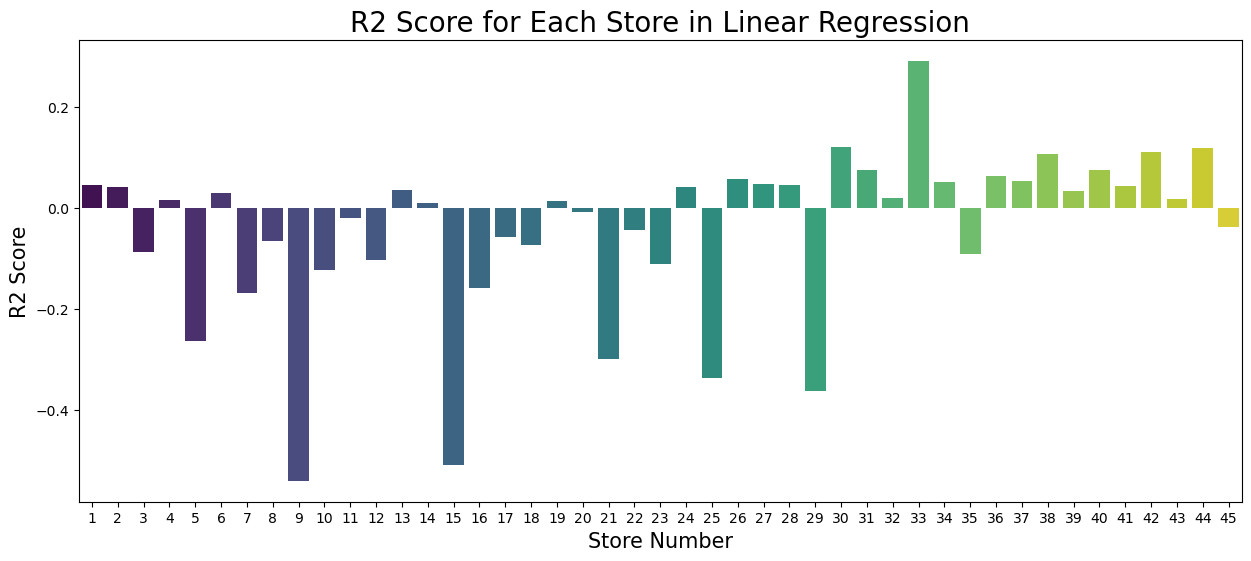

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df['Store Number'], y = store_r2_df['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Linear Regression', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [44]:
best_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax()]
worst_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmin()]
med_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax() - (store_r2_df['R2_Score'].idxmax() - store_r2_df['R2_Score'].idxmin()) // 2]

In [45]:
print('Best Store:', best_store)
print('Worst Store:', worst_store)
print('Medium Store:', med_store)

Best Store: Store Number    33.000000
R2_Score         0.291142
Name: 32, dtype: float64
Worst Store: Store Number    9.000000
R2_Score       -0.539049
Name: 8, dtype: float64
Medium Store: Store Number    21.000000
R2_Score        -0.298203
Name: 20, dtype: float64


In [46]:
# Get the values of the best, worst and median stores
best_store_val = best_store['R2_Score']
worst_store_val = worst_store['R2_Score']
med_store_val = med_store['R2_Score']

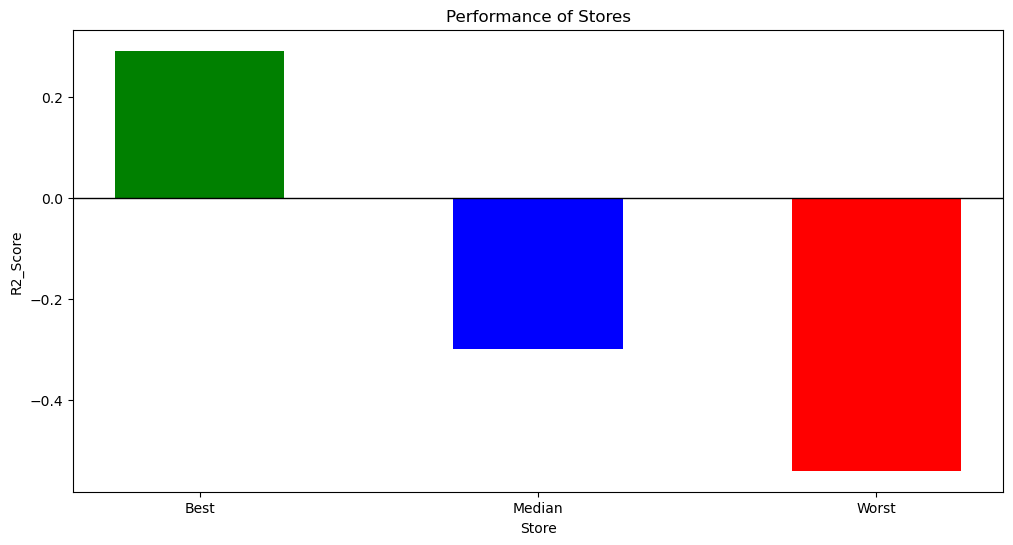

In [47]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val, med_store_val, worst_store_val], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Store')
plt.ylabel('R2_Score')
plt.title('Performance of Stores')
plt.show()

**DECISION TREE**

In [48]:
# now, we will train the model on the 20 stores
X_20 = df_20.drop(['Weekly_Sales','Date'], axis=1)
y_20 = df_20['Weekly_Sales']

In [49]:
# splitting the 20 stores into train and test sets
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)

In [50]:
# training the model
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_20, y_train_20)

DecisionTreeRegressor()

In [51]:
# now, we will train the model on the 10 stores
X_10 = df_10.drop(['Weekly_Sales', 'Date'], axis=1)
y_10 = df_10['Weekly_Sales']

In [52]:
# splitting the 10 stores into train and test sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)

In [53]:
# training the model
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_10, y_train_10)

DecisionTreeRegressor()

In [54]:
# now, we will merge the 20 and 10 stores and test the model 
X2 = pd.concat([X_train_20, X_train_10])
y2 = pd.concat([y_train_20, y_train_10])

In [55]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X2, y2)

DecisionTreeRegressor()

In [56]:
# testing the model
X_test1 = pd.concat([X_test_20, X_test_10])
y_test1 = pd.concat([y_test_20, y_test_10])

In [57]:
# predicting the output
y_pred2 = dt_regressor.predict(X_test1)

In [58]:
# calculating the accuracy of the model
accuracy = dt_regressor.score(X_test1, y_test1)
print('Model accuracy: ', accuracy)

Model accuracy:  0.9612411910440785


In [59]:
# then, we will select the store id's for the 15 stores
X_15 = df_15.drop(['Weekly_Sales','Date'], axis=1)
y_15 = df_15['Weekly_Sales']

In [60]:
# splitting the 20 stores into train and test sets
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

In [61]:
# training the model
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_15, y_train_15)

DecisionTreeRegressor()

In [62]:
# now, we will merge the 20 and 10 stores and test the model 
X3 = pd.concat([X_train_20, X_train_10,X_train_15])
y3 = pd.concat([y_train_20, y_train_10,y_train_15])

In [63]:
# training the model
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X3, y3)

DecisionTreeRegressor()

In [64]:
# testing the model
X_total_test2 = pd.concat([X_test1,X_test_15])
y_total_test2 = pd.concat([y_test1,y_test_15])

In [65]:
# predicting the output
y_pred3 = dt_regressor.predict(X_total_test2)

In [66]:
# calculating the accuracy of the model
accuracy = dt_regressor.score(X_total_test2, y_total_test2)
print('Model accuracy: ', accuracy)

Model accuracy:  0.9617733372323927


In [67]:
MAE = metrics.mean_absolute_error(y_total_test2, y_pred3)
MSE = metrics.mean_squared_error(y_total_test2, y_pred3)
RMSE = np.sqrt(metrics.mean_squared_error(y_total_test2, y_pred3))
print(MAE)
print(MSE)
print(RMSE)

1710.1234735219118
19165111.07043787
4377.797513640606


In [68]:
normalised_rmse = RMSE/(y_total_test2.max() - y_total_test2.min())
print('Normalised RMSE: ', normalised_rmse)

Normalised RMSE:  0.009212670625142928


In [69]:
dt_df = pd.DataFrame({'Actual': y_total_test2, 'Predicted': y_pred3})
dt_df

,Actual,Predicted
142869,3185.76,3446.82
99914,21652.33,28902.88
28627,1442.64,1408.16
3242,4671.82,4537.83
157201,304.40,97.67
...,...,...
330990,38190.53,32311.36
323110,2085.95,2569.10
322682,6720.76,8316.32
307940,2339.74,2577.02


In [70]:
store_r2 = []
for store_number in range(1, X_total_test2['Store'].nunique() + 1):
    store_array = (X_total_test2['Store'] == store_number)
    X_Store = X_total_test2[store_array]
    y_Store = y_total_test2[store_array]
    temp_array = [store_number, dt_regressor.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [71]:
store_r2_df2 = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])

In [72]:
store_r2_df2

,Store Number,R2_Score
0,1,0.979897
1,2,0.982285
2,3,0.976834
3,4,0.953765
4,5,0.960137
5,6,0.963386
6,7,0.963268
7,8,0.959112
8,9,0.912238
9,10,0.925779


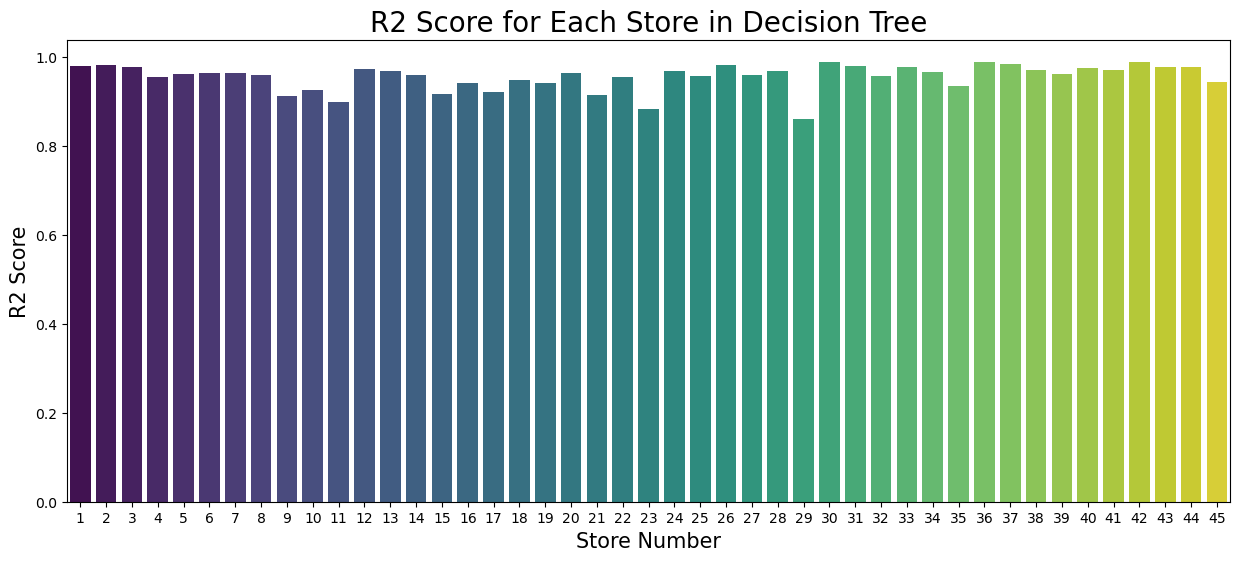

In [73]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df2['Store Number'], y = store_r2_df2['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Decision Tree', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [74]:
best_store2 = store_r2_df2.iloc[store_r2_df2['R2_Score'].idxmax()]
worst_store2 = store_r2_df2.iloc[store_r2_df2['R2_Score'].idxmin()]
med_store2 = store_r2_df2.iloc[store_r2_df2['R2_Score'].idxmax() - (store_r2_df2['R2_Score'].idxmax() - store_r2_df2['R2_Score'].idxmin()) // 2]

In [75]:
print('Best Store:', best_store2)
print('Worst Store:', worst_store2)
print('Medium Store:', med_store2)

Best Store: Store Number    42.000000
R2_Score         0.988547
Name: 41, dtype: float64
Worst Store: Store Number    29.000000
R2_Score         0.859803
Name: 28, dtype: float64
Medium Store: Store Number    36.000000
R2_Score         0.987225
Name: 35, dtype: float64


In [76]:
# Get the values of the best, worst and median stores
best_store_val2 = best_store2['R2_Score']
worst_store_val2 = worst_store2['R2_Score']
med_store_val2 = med_store2['R2_Score']

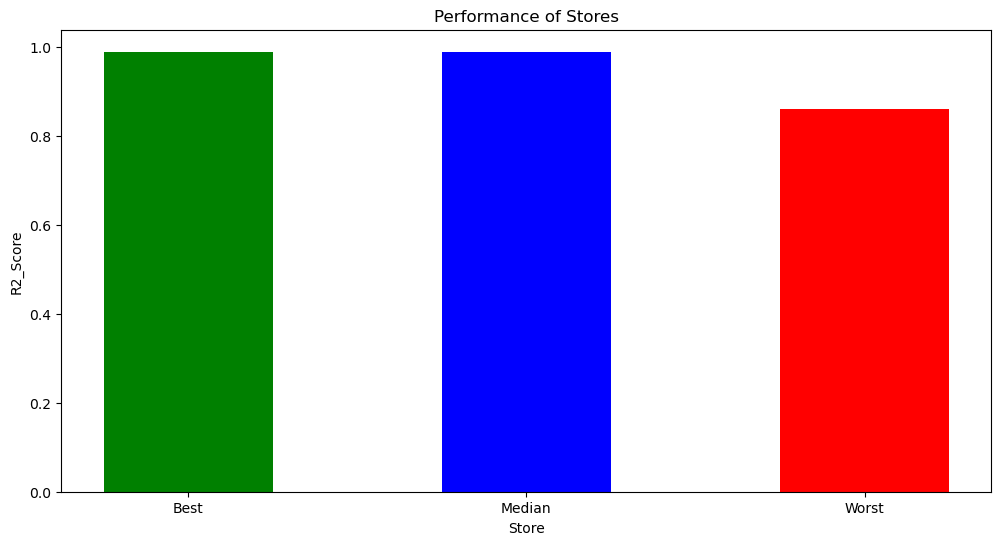

In [77]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val2, med_store_val2, worst_store_val2], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.xlabel('Store')
plt.ylabel('R2_Score')
plt.title('Performance of Stores')
plt.show()

**RANDOM FOREST**

In [78]:
# now, we will train the model on the 20 stores
X_20 = df_20.drop(['Weekly_Sales','Date'], axis=1)
y_20 = df_20['Weekly_Sales']

In [79]:
# splitting the 20 stores into train and test sets
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)

In [80]:
# training the model
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train_20, y_train_20)

RandomForestRegressor(n_estimators=10, random_state=0)

In [81]:
# now, we will train the model on the 10 stores
X_10 = df_10.drop(['Weekly_Sales', 'Date'], axis=1)
y_10 = df_10['Weekly_Sales']

In [82]:
# splitting the 10 stores into train and test sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)

In [83]:
# training the model
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train_10, y_train_10)

RandomForestRegressor(n_estimators=10, random_state=0)

In [84]:
# now, we will merge the 20 and 10 stores and test the model 
X4 = pd.concat([X_train_20, X_train_10])
y4 = pd.concat([y_train_20, y_train_10])

In [85]:
# training the model
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X4, y4)

RandomForestRegressor(n_estimators=10, random_state=0)

In [86]:
# testing the model
X_test2 = pd.concat([X_test_20, X_test_10])
y_test2 = pd.concat([y_test_20, y_test_10])

In [87]:
# predicting the output
y_pred4 = rf_regressor.predict(X_test2)

In [88]:
# calculating the accuracy of the model
accuracy = rf_regressor.score(X_test2, y_test2)
print('Model accuracy: ', accuracy)

Model accuracy:  0.9772317401661769


In [89]:
# then, we will select the store id's for the 15 stores
X_15 = df_15.drop(['Weekly_Sales','Date'], axis=1)
y_15 = df_15['Weekly_Sales']

In [90]:
# splitting the 20 stores into train and test sets
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

In [91]:
# training the model
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train_15, y_train_15)

RandomForestRegressor(n_estimators=10, random_state=0)

In [92]:
# now, we will merge the 20 and 10 stores and test the model 
X5 = pd.concat([X_train_20, X_train_10,X_train_15])
y5 = pd.concat([y_train_20, y_train_10,y_train_15])

In [93]:
# training the model
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X5, y5)

RandomForestRegressor(n_estimators=10, random_state=0)

In [94]:
# testing the model
X_total_test3 = pd.concat([X_test2,X_test_15])
y_total_test3 = pd.concat([y_test2,y_test_15])

In [95]:
# predicting the output
y_pred5 = rf_regressor.predict(X_total_test3)

In [96]:
# calculating the accuracy of the model
accuracy = rf_regressor.score(X_total_test3, y_total_test3)
print('Model accuracy: ', accuracy)

Model accuracy:  0.9780161324024712


In [97]:
MAE = metrics.mean_absolute_error(y_total_test3, y_pred5)
MSE = metrics.mean_squared_error(y_total_test3, y_pred5)
RMSE = np.sqrt(metrics.mean_squared_error(y_total_test3, y_pred5))
print(MAE)
print(MSE)
print(RMSE)

1357.9281488940283
11021711.908931315
3319.8963702096657


In [98]:
normalised_rmse = RMSE/(y_total_test3.max() - y_total_test3.min())
print('Normalised RMSE: ', normalised_rmse)

Normalised RMSE:  0.006986415354536221


In [99]:
rf_df = pd.DataFrame({'Actual': y_total_test3, 'Predicted': y_pred5})
rf_df

,Actual,Predicted
142869,3185.76,3295.338
99914,21652.33,25065.918
28627,1442.64,1362.284
3242,4671.82,5323.274
157201,304.40,163.968
...,...,...
330990,38190.53,38479.257
323110,2085.95,2783.021
322682,6720.76,8094.347
307940,2339.74,2602.331


In [100]:
store_r2 = []
for store_number in range(1, X_total_test3['Store'].nunique() + 1):
    store_array = (X_total_test3['Store'] == store_number)
    X_Store = X_total_test3[store_array]
    y_Store = y_total_test3[store_array]
    temp_array = [store_number, rf_regressor.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [101]:
store_r2_df3 = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])

In [102]:
store_r2_df3

,Store Number,R2_Score
0,1,0.984596
1,2,0.988683
2,3,0.979776
3,4,0.978649
4,5,0.964387
5,6,0.980510
6,7,0.968407
7,8,0.971304
8,9,0.968705
9,10,0.955934


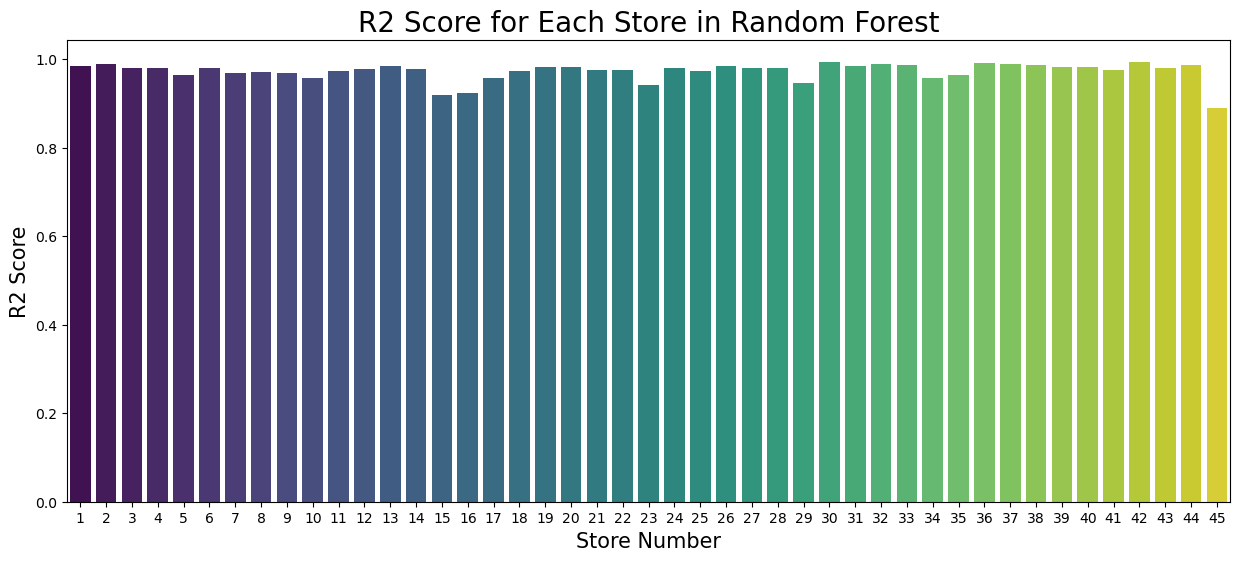

In [103]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df3['Store Number'], y = store_r2_df3['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Random Forest', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [104]:
best_store3 = store_r2_df3.iloc[store_r2_df3['R2_Score'].idxmax()]
worst_store3 = store_r2_df3.iloc[store_r2_df3['R2_Score'].idxmin()]
med_store3 = store_r2_df3.iloc[store_r2_df3['R2_Score'].idxmax() - (store_r2_df3['R2_Score'].idxmax() - store_r2_df3['R2_Score'].idxmin()) // 2]

In [105]:
print('Best Store:', best_store3)
print('Worst Store:', worst_store3)
print('Medium Store:', med_store3)

Best Store: Store Number    30.000000
R2_Score         0.993797
Name: 29, dtype: float64
Worst Store: Store Number    45.000000
R2_Score         0.889388
Name: 44, dtype: float64
Medium Store: Store Number    38.000000
R2_Score         0.986093
Name: 37, dtype: float64


In [119]:
# Get the values of the best, worst and median stores
best_store_val3 = best_store3['R2_Score']
worst_store_val3 = worst_store3['R2_Score']
med_store_val3 = med_store3['R2_Score']

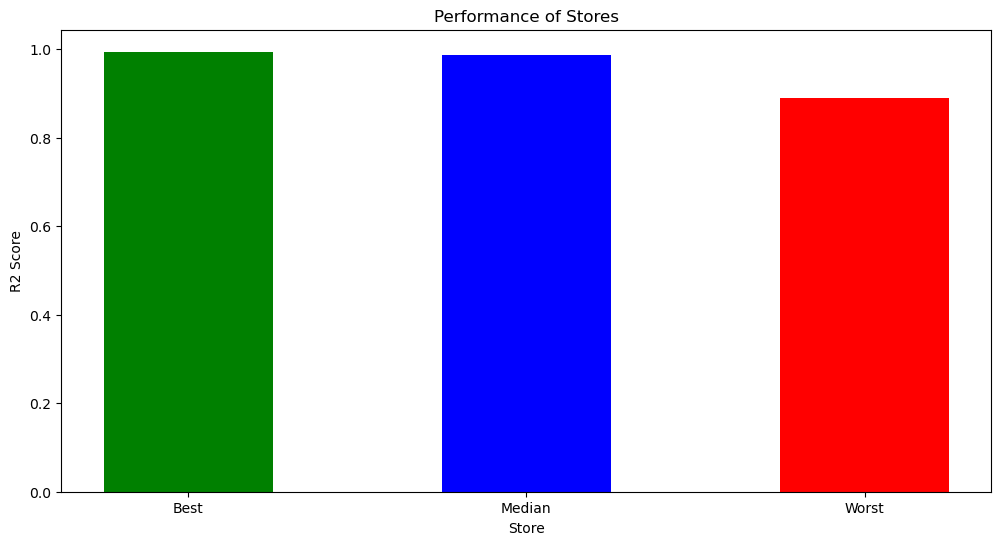

In [120]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val3, med_store_val3, worst_store_val3], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.xlabel('Store')
plt.ylabel('R2 Score')
plt.title('Performance of Stores')
plt.show()

**XGBOOST**

In [ ]:
# now, we will train the model on the 20 stores
X_20 = df_20.drop(['Weekly_Sales','Date'], axis=1)
y_20 = df_20['Weekly_Sales']

In [ ]:
# splitting the 20 stores into train and test sets
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train_20, y_train_20)

In [ ]:
# now, we will train the model on the 10 stores
X_10 = df_10.drop(['Weekly_Sales', 'Date'], axis=1)
y_10 = df_10['Weekly_Sales']

In [ ]:
# splitting the 10 stores into train and test sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train_10, y_train_10)

In [ ]:
# now, we will merge the 20 and 10 stores and test the model 
X6 = pd.concat([X_train_20, X_train_10])
y6 = pd.concat([y_train_20, y_train_10])

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X6, y6)

In [ ]:
# testing the model
X_test3 = pd.concat([X_test_20, X_test_10])
y_test3 = pd.concat([y_test_20, y_test_10])

In [ ]:
# predicting the output
y_pred3 = xgbr.predict(X_test3)

In [ ]:
# calculating the accuracy of the model
accuracy = xgbr.score(X_test3, y_test3)
print('Model accuracy: ', accuracy)

In [ ]:
# then, we will select the store id's for the 15 stores
X_15 = df_15.drop(['Weekly_Sales','Date'], axis=1)
y_15 = df_15['Weekly_Sales']

In [ ]:
# splitting the 20 stores into train and test sets
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=42)

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train_15, y_train_15)

In [ ]:
# now, we will merge the 20 and 10 stores and test the model 
X7 = pd.concat([X_train_20, X_train_10,X_train_15])
y7 = pd.concat([y_train_20, y_train_10,y_train_15])

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X7, y7)

In [ ]:
# testing the model
X_total_test4 = pd.concat([X_test3,X_test_15])
y_total_test4 = pd.concat([y_test3,y_test_15])

In [ ]:
# predicting the output
y_pred7 = xgbr.predict(X_total_test4)

In [ ]:
# calculating the accuracy of the model
accuracy = xgbr.score(X_total_test4, y_total_test4)
print('Model accuracy: ', accuracy)

In [ ]:
MAE = metrics.mean_absolute_error(y_total_test4, y_pred7)
MSE = metrics.mean_squared_error(y_total_test4, y_pred7)
RMSE = np.sqrt(metrics.mean_squared_error(y_total_test4, y_pred7))
print(MAE)
print(MSE)
print(RMSE)

In [ ]:
normalised_rmse = RMSE/(y_total_test4.max() - y_total_test4.min())
print('Normalised RMSE: ', normalised_rmse)

In [ ]:
xgbr_df = pd.DataFrame({'Actual': y_total_test4, 'Predicted': y_pred7})
xgbr_df

In [ ]:
store_r2 = []
for store_number in range(1, X_total_test4['Store'].nunique() + 1):
    store_array = (X_total_test4['Store'] == store_number)
    X_Store = X_total_test4[store_array]
    y_Store = y_total_test4[store_array]
    temp_array = [store_number, xgbr.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [110]:
store_r2_df4 = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])

In [111]:
store_r2_df4

,Store Number,R2_Score
0,1,0.984596
1,2,0.988683
2,3,0.979776
3,4,0.978649
4,5,0.964387
5,6,0.980510
6,7,0.968407
7,8,0.971304
8,9,0.968705
9,10,0.955934


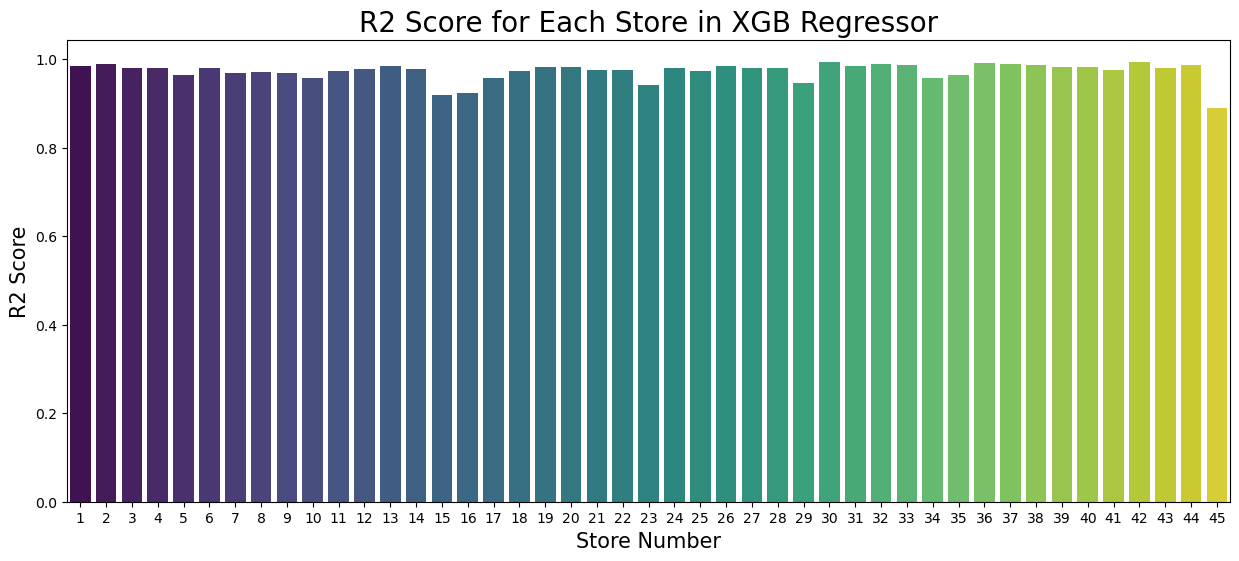

In [112]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df4['Store Number'], y = store_r2_df4['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in XGB Regressor', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [113]:
best_store4 = store_r2_df4.iloc[store_r2_df4['R2_Score'].idxmax()]
worst_store4 = store_r2_df4.iloc[store_r2_df4['R2_Score'].idxmin()]
med_store4 = store_r2_df4.iloc[store_r2_df4['R2_Score'].idxmax() - (store_r2_df4['R2_Score'].idxmax() - store_r2_df4['R2_Score'].idxmin()) // 2]

In [114]:
print('Best Store:', best_store4)
print('Worst Store:', worst_store4)
print('Medium Store:', med_store4)

Best Store: Store Number    30.000000
R2_Score         0.993797
Name: 29, dtype: float64
Worst Store: Store Number    45.000000
R2_Score         0.889388
Name: 44, dtype: float64
Medium Store: Store Number    38.000000
R2_Score         0.986093
Name: 37, dtype: float64


In [115]:
# Get the values of the best, worst and median stores
best_store_val4 = best_store4['R2_Score']
worst_store_val4 = worst_store4['R2_Score']
med_store_val4 = med_store4['R2_Score']

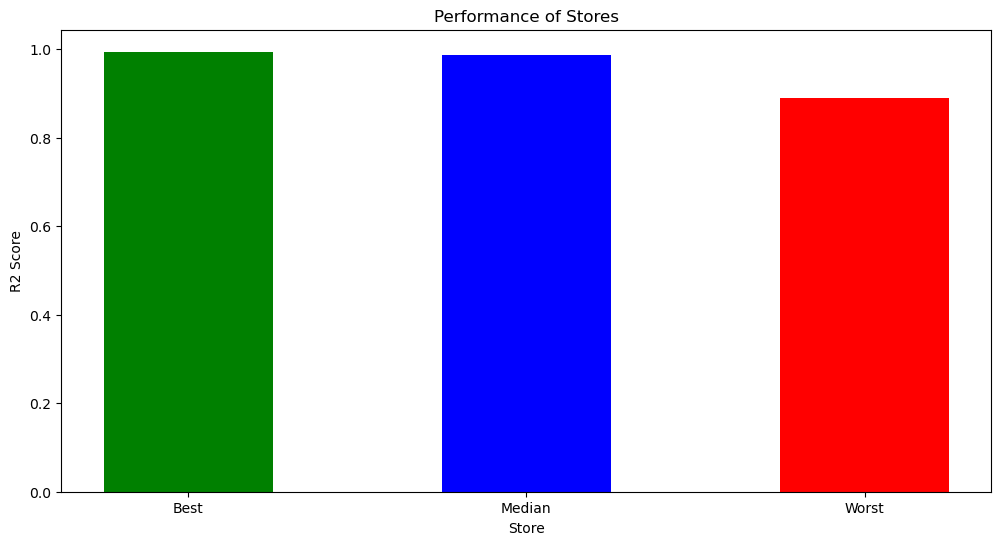

In [116]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val4, med_store_val4, worst_store_val4], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.xlabel('Store')
plt.ylabel('R2 Score')
plt.title('Performance of Stores')
plt.show()

In [117]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "MAE","MSE", "RMSE", "NRMSE", "R2_score"]
x.add_row(["Linear Regression", 14486, 458291041, 21407, 0.04505, 8.58])
x.add_row(["DecisionTreeRegressor", 1707, 19159131, 4377,0.0092, 96.2])
x.add_row(["RandomForestRegressor", 1357, 11021711,3319, 0.0069, 97.8])
x.add_row(["XGBoost", 2910, 24699043, 4969, 0.0104, 95.07 ])
print(x)

+-----------------------+-------+-----------+-------+---------+----------+
|         Model         |  MAE  |    MSE    |  RMSE |  NRMSE  | R2_score |
+-----------------------+-------+-----------+-------+---------+----------+
|   Linear Regression   | 14486 | 458291041 | 21407 | 0.04505 |   8.58   |
| DecisionTreeRegressor |  1707 |  19159131 |  4377 |  0.0092 |   96.2   |
| RandomForestRegressor |  1357 |  11021711 |  3319 |  0.0069 |   97.8   |
|        XGBoost        |  2910 |  24699043 |  4969 |  0.0104 |  95.07   |
+-----------------------+-------+-----------+-------+---------+----------+
